In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("DatosLimpios_2Y.xlsx", names=['Animado', 'Confiable', 'Extravertido', 'Responsable', 'Serio','estilo'])
df

,Animado,Confiable,Extravertido,Responsable,Serio,estilo
5,1,0,0,0,0,1
6,0,0,0,1,0,1
11,0,0,0,0,1,1
12,0,0,0,0,1,1
13,1,0,0,0,0,1
...,...,...,...,...,...,...
2197,0,0,0,1,0,0
2200,0,1,0,0,0,0
2201,1,0,0,0,0,1
2204,1,0,0,0,0,1


In [ ]:
df

,Animado,Confiable,Extravertido,Responsable,Serio,estilo
5,1,0,0,0,0,1
6,0,0,0,1,0,1
11,0,0,0,0,1,1
12,0,0,0,0,1,1
13,1,0,0,0,0,1
...,...,...,...,...,...,...
2197,0,0,0,1,0,0
2200,0,1,0,0,0,0
2201,1,0,0,0,0,1
2204,1,0,0,0,0,1


In [ ]:
dataset = df.values
X = dataset[:, :-1]
y=dataset[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1200, alpha=0.0001,
                  solver='adam', random_state=21, tol=0.000000001)
#mlp = MLPClassifier(hidden_layer_sizes=(5,5,5,5), max_iter=5000)
mlp.fit(X_train, y_train)
predictions=mlp.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.38      0.53       113
           1       0.60      0.95      0.74       112

    accuracy                           0.66       225
   macro avg       0.74      0.66      0.63       225
weighted avg       0.74      0.66      0.63       225



In [ ]:
print("precisión entranamiento: {0: .2f}".format(
        mlp.score(X_train, y_train)))

precisión entranamiento:  0.72


In [ ]:
print("precisión entranamiento: {0: .2f}".format(
        mlp.score(X_test, y_test)))

precisión entranamiento:  0.66


In [ ]:
from sklearn.model_selection import cross_val_score 

In [ ]:
a = cross_val_score(mlp, X_train, y_train, cv = 5, scoring="accuracy")
a.mean()

0.6946703296703296

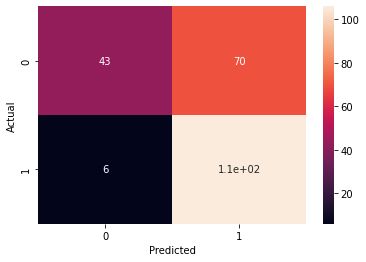

In [ ]:
from sklearn.model_selection import cross_val_score 
from sklearn import svm
from sklearn import metrics

confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
### Evaluate the model

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, predictions))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test,predictions))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, predictions))

Accuracy: 0.6622222222222223
Precision: 0.6022727272727273
Recall: 0.9464285714285714
